# Algae Bloom Data Investigation
https://msoese.atlassian.net/browse/WABS-23

In [106]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [84]:
# Read in the data set
df = pd.read_csv("../../data/cleaned/site1_vineyard.csv")
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
count,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.00000,18947.000000,18947.000000,18947.000000
mean,18.488235,1933.564575,-116.806951,8.633415,58.129348,9.494712,2.62507,87.056980,8.179008,0.979511
std,6.134464,151.800551,8.973830,0.147231,54.622278,6.464266,1.70465,13.793755,1.278416,0.731423
min,5.630000,3.000000,-153.700000,7.930000,0.660000,-0.300000,0.00000,62.800000,5.170000,0.000000
25%,12.700000,1848.000000,-120.800000,8.530000,29.850000,4.700000,1.40000,80.000000,7.260000,0.500000
50%,20.320000,1939.000000,-115.700000,8.650000,42.140000,8.200000,2.30000,83.200000,8.080000,0.900000
75%,23.630000,2070.000000,-112.100000,8.700000,65.795000,12.300000,3.40000,88.900000,9.250000,1.200000
max,28.570000,2164.000000,-76.500000,9.230000,636.700000,102.000000,27.00000,209.700000,16.170000,16.100000


In [85]:
df.dtypes

Date (mm.dd.yyy)        object
Time 24hr               object
Temp C                 float64
Sp Cond (uS/cm)          int64
pH (mV)                float64
pH                     float64
Trubidity (NTU)        float64
Chlorophyll (ug/L)     float64
Chlorophyll RFU        float64
ODOSat%                float64
ODO (mg/L)             float64
BGA-Phycocyanin RFU    float64
dtype: object

In [86]:
# Create a new column categorizing an algae bloom above an RFU threshhold 
df["bloom"] = df["BGA-Phycocyanin RFU"].apply(lambda x: 1 if x >= 1.0 else 0)
df["bloom"] = df["bloom"].astype("bool")
df.head()

,Date (mm.dd.yyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,bloom
0,5/5/2017,0:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4,False
1,5/5/2017,0:15,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4,False
2,5/5/2017,0:30,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4,False
3,5/5/2017,0:45,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4,False
4,5/5/2017,1:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4,False


In [87]:
#Add a single datetime column
df["datetime"] = df["Date (mm.dd.yyy)"] + " " + df["Time 24hr"]
df["datetime"] = pd.to_datetime(df["datetime"])

## Features vs BGA RFU Charts

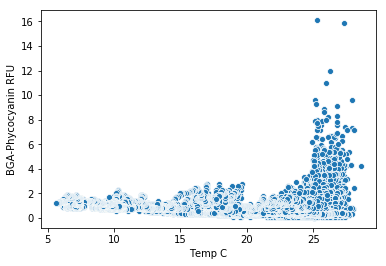

In [88]:
sns.scatterplot(x='Temp C', y='BGA-Phycocyanin RFU', data=df)

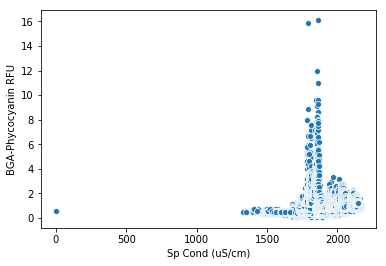

In [89]:
sns.scatterplot(x='Sp Cond (uS/cm)', y='BGA-Phycocyanin RFU', data=df)

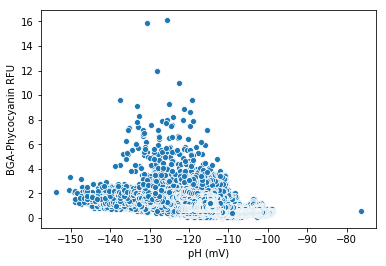

In [90]:
sns.scatterplot(x='pH (mV)', y='BGA-Phycocyanin RFU', data=df)

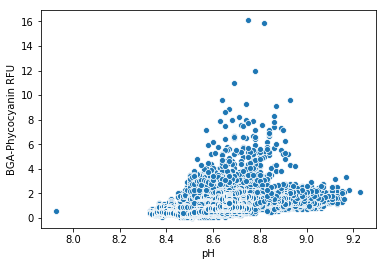

In [91]:
sns.scatterplot(x='pH', y='BGA-Phycocyanin RFU', data=df)

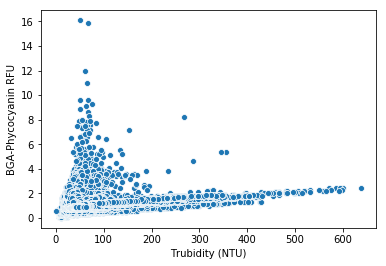

In [92]:
sns.scatterplot(x='Trubidity (NTU)', y='BGA-Phycocyanin RFU', data=df)

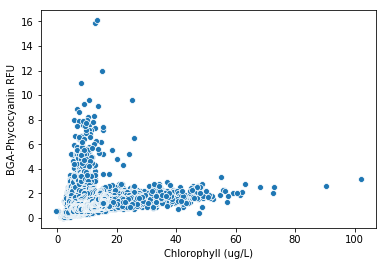

In [93]:
sns.scatterplot(x='Chlorophyll (ug/L)', y='BGA-Phycocyanin RFU', data=df)

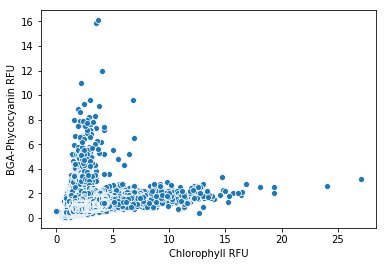

In [94]:
sns.scatterplot(x='Chlorophyll RFU', y='BGA-Phycocyanin RFU', data=df)

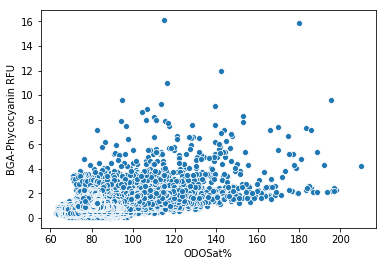

In [95]:
sns.scatterplot(x='ODOSat%', y='BGA-Phycocyanin RFU', data=df)

## Classified Scatter Plot Matrix

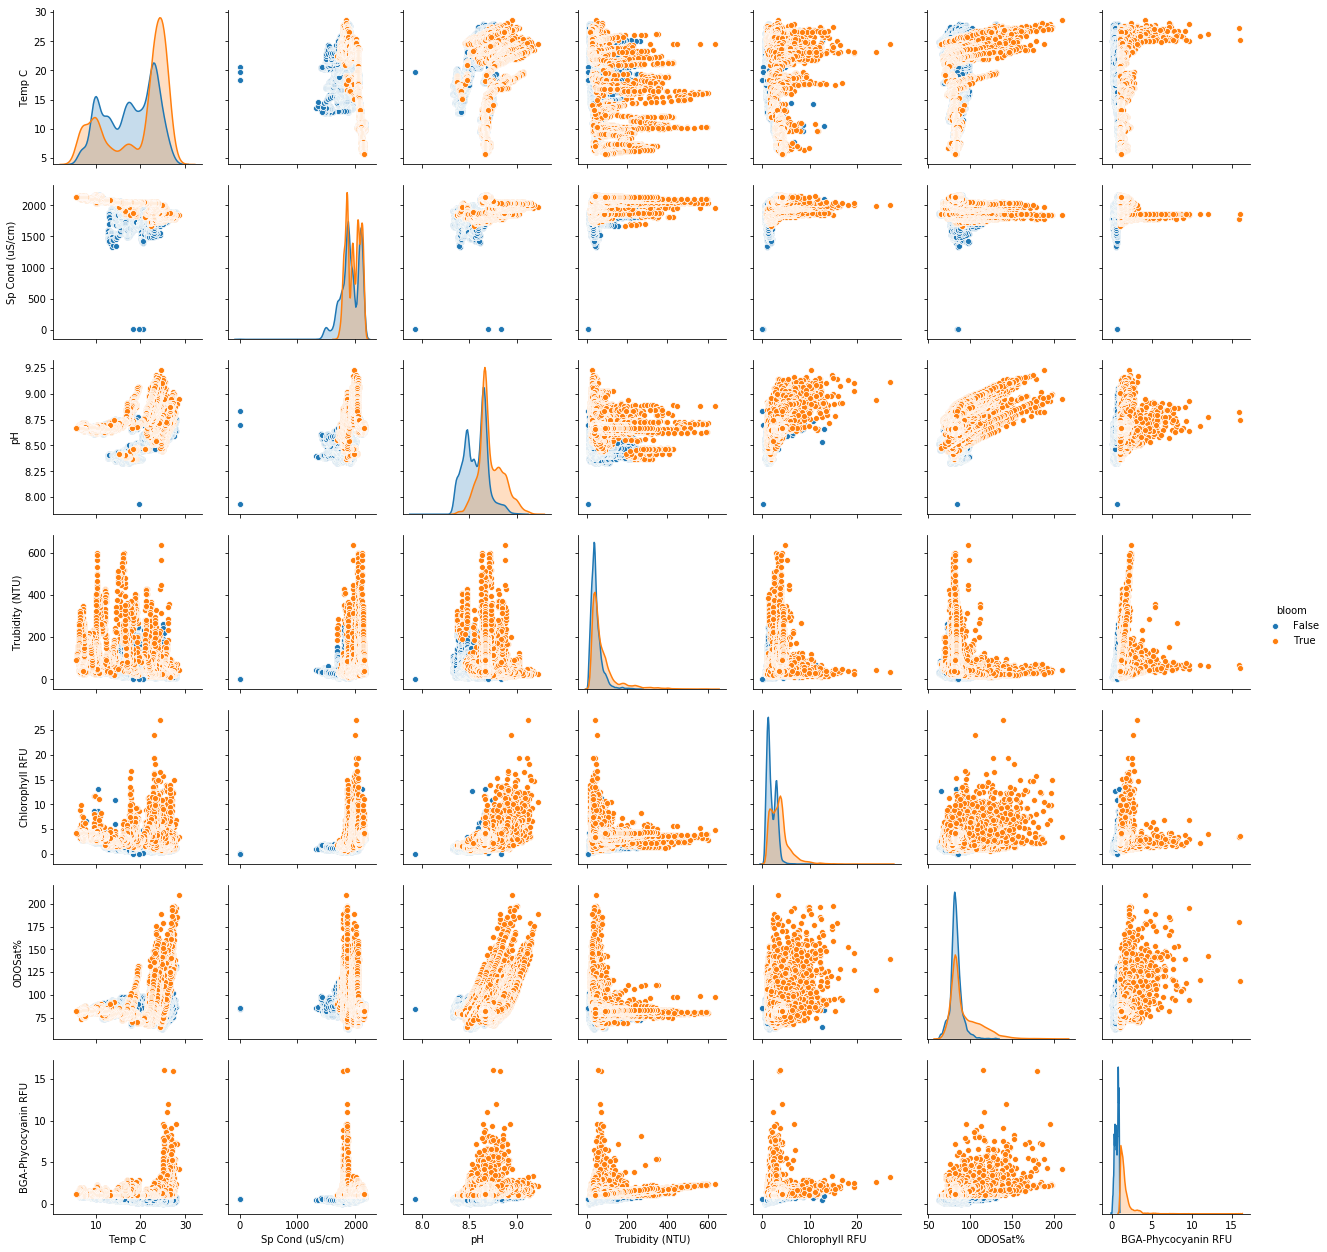

In [96]:
# Create a scatter matrix plot without colinear variables (i.e. ODO and ODOSat%) variables and the datetime column
plot_df = df.drop(columns=['Date (mm.dd.yyy)', 'Time 24hr', 'bloom', 'datetime', 'ODO (mg/L)', 'pH (mV)', 'Chlorophyll (ug/L)'])
# categorized_scatter_plots(df, plot_df.columns, 'bloom')
sns.pairplot(data=df, hue='bloom', vars=plot_df.columns)

## Variables over time

C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


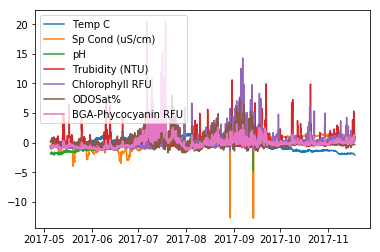

In [114]:
# Plot a chart with all variables over time.
legend = []
scaler = StandardScaler()
for column in plot_df.columns:
    legend.append(column)
    data = scaler.fit_transform(df[[column]].values)
    plt.plot(df['datetime'].values, data)
plt.legend(legend)
plt.show()